## import libary

In [126]:
import pandas as pd
import plotly
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [127]:
df=pd.read_excel('721Q F-stock 050422.xlsx',sheet_name='Total stock')
df.columns

Index(['Plnt', 'Material', 'Material Description', 'ProcType', 'MRPC',
       'Total stock', 'Total stock value INR', 'Total stock value EUR',
       'Unit cost EUR', 'Stock % of demand', 'Total demand',
       'Total demand EUR', 'Max weekly demand', 'Avg demand', 'Avg. adjusted',
       'Std dev', 'Segmentation', 'Coefficient', 'Frequency', 'Risk HML',
       'Leadtime days', 'Leadtime weeks', 'Safety Stock', 'Minimum stock',
       'Long LT safety', 'Target stock', 'Max stock',
       'Deviation actual stock vs target, ABS', 'Unhealthy stock EUR\nABS',
       '% of total stock', 'Min stock EUR', 'Target stock EUR',
       'Max stock EUR', 'Target calc', 'Target stock.1',
       'Target level % of demand', 'Max stock.1', 'EOQ', 'Min stock',
       'Stock value EUR Min', 'Stock value EUR Target', 'Stock value EUR Max',
       'SPT', 'MS', 'Maturity', 'LS', 'Typ', 'Trace Code', 'Trace Method',
       'Profl.', 'BMR', 'As-Built Indicator', 'MRPpr', 'P.Prof', 'ProdS',
       'MRP', 'Stan

In [128]:
#df=df.rename(columns=df.iloc[1])

df=df[['Material','Material Description','weight uni Un','Total demand EUR','Leadtime days','Unit cost EUR','Gross Weight','vendor location','demand Fluc']]

In [129]:
df.isnull().sum()
df['Leadtime days'] = df['Leadtime days'].fillna(0)

In [130]:
dflala=df

In [131]:
df=df.set_index('Material')


In [132]:
df=df.drop(columns='Material Description')

In [133]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['vendor location'])
# Drop column B as it is now encoded
df = df.drop('vendor location',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,weight uni Un,Total demand EUR,Leadtime days,Unit cost EUR,Gross Weight,demand Fluc,import,local,new
Material,,,,,,,,,
119268,15870.00,3.496944e+07,126.0,86772.794886,15.870,X,0,1,0
29225790,3294.00,2.171810e+07,133.0,18420.779205,3.294,X,0,0,1
29107155,5540.00,1.701066e+07,65.0,78030.558068,5540.000,X,0,1,0
29086880,5955.00,1.366207e+07,65.0,33900.928864,5955.000,X,1,0,0
29260928,26133.00,1.312801e+07,91.0,184901.511364,26.133,Y,0,0,1
...,...,...,...,...,...,...,...,...,...
VT711307,1057.00,0.000000e+00,63.0,0.000000,1.057,Y,0,1,0
VT730076,14.20,0.000000e+00,0.0,0.000000,14.200,D,0,0,1
VT730077,19.12,0.000000e+00,0.0,0.000000,19.120,D,0,0,1


In [134]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['demand Fluc'])
# Drop column B as it is now encoded
df = df.drop('demand Fluc',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,weight uni Un,Total demand EUR,Leadtime days,Unit cost EUR,Gross Weight,import,local,new,D,X,Y,Z
Material,,,,,,,,,,,,
119268,15870.00,3.496944e+07,126.0,86772.794886,15.870,0,1,0,0,1,0,0
29225790,3294.00,2.171810e+07,133.0,18420.779205,3.294,0,0,1,0,1,0,0
29107155,5540.00,1.701066e+07,65.0,78030.558068,5540.000,0,1,0,0,1,0,0
29086880,5955.00,1.366207e+07,65.0,33900.928864,5955.000,1,0,0,0,1,0,0
29260928,26133.00,1.312801e+07,91.0,184901.511364,26.133,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
VT711307,1057.00,0.000000e+00,63.0,0.000000,1.057,0,1,0,0,0,1,0
VT730076,14.20,0.000000e+00,0.0,0.000000,14.200,0,0,1,1,0,0,0
VT730077,19.12,0.000000e+00,0.0,0.000000,19.120,0,0,1,1,0,0,0


In [135]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

In [136]:
x=df.fillna(0)
transform = preprocessing.StandardScaler()
transform.fit(x)
x = transform.transform(x)

In [137]:
X=x

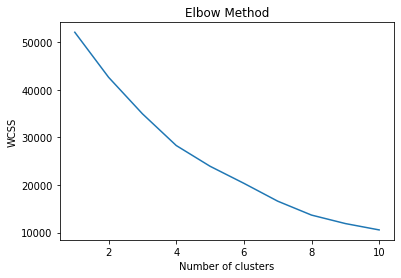

In [138]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

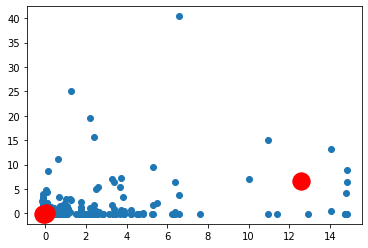

In [139]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [140]:
pred_y

array([2, 3, 2, ..., 1, 1, 3])

In [141]:
df.index

Index(['119268', '29225790', '29107155', '29086880', '29260928', '29109249',
       '107027', '29225087', '29256801', '29084673',
       ...
       'VT20022996', 'VT206101', 'VT70000830', 'VT70001726', 'VT70002478',
       'VT711307', 'VT730076', 'VT730077', 'VT730369', 'VT839693'],
      dtype='object', name='Material', length=4339)

In [142]:
# creating a list of index names
index_values = df.index
   
# creating a list of column names
column_values = ['cluster']
  
# creating the dataframe
dff = pd.DataFrame(data = pred_y, 
                  index = index_values, 
                  columns = column_values)
dff

,cluster
Material,
119268,2
29225790,3
29107155,2
29086880,3
29260928,2
...,...
VT711307,0
VT730076,1
VT730077,1


In [143]:
dff.reset_index(inplace=True)

In [144]:
df=dff.merge(dflala, left_on="Material", right_on="Material")
df.head()

,Material,cluster,Material Description,weight uni Un,Total demand EUR,Leadtime days,Unit cost EUR,Gross Weight,vendor location,demand Fluc
0,119268,2,GEARBOX V100 50Hz,15870.0,3.496944e+07,126.0,86772.794886,15.870,local,X
1,29225790,3,"BEARING BLADE 2871 3RR H270,5",3294.0,2.171810e+07,133.0,18420.779205,3.294,new,X
2,29107155,2,CUBEPOWER 3315,5540.0,1.701066e+07,65.0,78030.558068,5540.000,local,X
3,29086880,3,GEN 2MW 4-POLE FULLY MOUNTED,5955.0,1.366207e+07,65.0,33900.928864,5955.000,import,X
4,29260928,2,GEARBOX GENERIC I=143.2 NOM SYS6K,26133.0,1.312801e+07,91.0,184901.511364,26.133,new,Y


In [179]:
df['clustershape']=df['cluster'].replace(0,"darkblue").replace(1,  "green").replace(3, "orange").replace(2, "red")

df['vendor location']= df['vendor location'].replace(0,"square").replace('local',  "circle").replace('import', "diamond").replace('new', "square")
df

,Material,cluster,Material Description,weight uni Un,Total demand EUR,Leadtime days,Unit cost EUR,Gross Weight,vendor location,demand Fluc,clustershape
0,119268,2,GEARBOX V100 50Hz,15870.00,3.496944e+07,126.0,86772.794886,15.870,circle,X,red
1,29225790,3,"BEARING BLADE 2871 3RR H270,5",3294.00,2.171810e+07,133.0,18420.779205,3.294,square,X,orange
2,29107155,2,CUBEPOWER 3315,5540.00,1.701066e+07,65.0,78030.558068,5540.000,circle,X,red
3,29086880,3,GEN 2MW 4-POLE FULLY MOUNTED,5955.00,1.366207e+07,65.0,33900.928864,5955.000,diamond,X,orange
4,29260928,2,GEARBOX GENERIC I=143.2 NOM SYS6K,26133.00,1.312801e+07,91.0,184901.511364,26.133,square,Y,red
...,...,...,...,...,...,...,...,...,...,...,...
4334,VT711307,0,LOW HUB FRAME FOR 2MW,1057.00,0.000000e+00,63.0,0.000000,1.057,circle,Y,darkblue
4335,VT730076,1,SHACKLE BOW BLT 25t,14.20,0.000000e+00,0.0,0.000000,14.200,square,D,green
4336,VT730077,1,SHACKLE BOW BLT 35t,19.12,0.000000e+00,0.0,0.000000,19.120,square,D,green
4337,VT730369,1,SLING RNEN 1.5m 1t,0.42,0.000000e+00,0.0,0.000000,0.420,square,D,green


In [180]:
#Set marker properties
markersize = df['weight uni Un']/1000
markercolor = df['clustershape']
markershape = df['vendor location']


#Make Plotly figure
fig1 = go.Scatter3d(x=df['Unit cost EUR'],
                    y=df['Total demand EUR'],
                    z=df['Leadtime days'],
                    marker=dict(size=markersize,
                                color=markercolor,
                                symbol=markershape,
                                opacity=0.8,
                                reversescale=True,
                                colorscale='oranges'),
                    line=dict (width=0.02),
                    mode='markers',
                    hovertemplate='<b>%{text}</b><extra></extra>',
                    text = df[['Material','Material Description']])

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title='cost'),
                                yaxis=dict( title='demand'),
                                zaxis=dict(title='leadtime')),
                     title="721Q inventory features 6D visualization & clustering (April data)")
                                


#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("feature.html"))


'feature.html'